<a href="https://colab.research.google.com/github/joshuabdixon/Predicting-Customer-Churn-with-Supervised-Learning/blob/main/Predicting_Student_Dropout_with_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project 6.3 Applying supervised learning to predict student dropout rate

The purpose of this code is to examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

## **Business context**
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment. Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided a dataset and wishes to determine which features are most likely to influence student dropout. The features provided are as follows:


- **CentreName**: Study Group centre name/identifier
- **AcademicYear**: Academic year of Study Group course
- **LearnerCode**: Student identifier
- **BookingId**: A unique identifier for the learner's course booking
- **BookingType**: The type of booking made for the course
- **LeadSource**: How the learner found out about the course
- **DiscountType**: The type of discount applied to the learner’s course fees, if any
- **DateofBirth**: The student's date of birth
- **Gender**: The student’s gender
- **Nationality**: The student's nationality
- **HomeCountry**: The country where the learner's permanent residence is located
- **HomeState**: The state or province where the learner's permanent residence is located
- **HomeCity**: The city where the learner's permanent residence is located
- **CourseLevel**: The academic level of Study Group course, e.g. foundation, International Year 1 or Pre-Masters
- **CourseName**: The full name of the course studied, e.g. Pre-Masters Business
- **CourseFirstIntakeDate**: The fist date the course ever ran
- **IsFirstIntake**: Whether the student was part of the first ever cohort for their course
- **CourseStartDate**: The official start date of the course (not when the student started)
- **CourseEndDate**: The official end date of the course. If the student completed their course this is when they finished. For non-completers, see TerminationDate.
- **CompletedCourse**: Yes/No whether the student completed the course
- **NonCompletionReason**: The reason a learner did not complete the course, if applicable. E.g. whether the student was terminated or voluntarily withdrew/deferred
- **ArrivedDate**: Date the student officially started their course
- **TerminationDate**: Data that non-completing students stopped studying. For students that did complete their course, their studies officially finished on the CourseEndDate
- **AssessedModule**: Total number of modules with assessment data
- **PassedModules**: The total number of modules the learner passed
- **FailedModules**: The total number of modules the learner failed
- **CreditWeightedAverage**: Each module a student takes has a credit equivalence (because some modules are weighted more heavily than others). This field aggregates the student’s module scores across all of their credit weighted modules to yield an overall percentage that has been rounded to a whole number. CreditWeightedAverage = sum(ModuleCreditsAchieved/Sum(ModuleCreditEquivalence)
- **ProgressionDegree**: The student’s intended degree of study at the partner university (if eligible to progress)
- **ProgressionUniversity**: The student’s intended partner university (if eligible to progress)
- **EligibleToProgress**: Yes/No whether the student’s academic results across the course make them eligible to progress to the partner university and study their chosen degree.
- **PresentCount**: Count of lessons the student attended (across all modules)
- **LateCount**: Count of lessons the student attended but was late for (across all modules)
- **AuthorisedAbsenceCount**: Count of lessons where student’s absence was explained and authorised e.g. medical reasons, extensuating circumstances, etc. (across all modules)
- **UnauthorisedAbsenceCount**: Count of lessons where no explanation was given for student absence, or explanation was deemed unsatisfactory (across all modules)
- **ContactHours**: The total number of timetabled hours the student was expected to attend (across all modules)
- **AttendancePercentage**: The percentage of classes the learner attended (PresentCount + LateCount + AuthroisedAbsenceCount) / (PresentCount + LateCount + AuthroisedAbsenceCount + UnAuthroisedAbsenceCount )

Several of the above features have been removed from the dataset due to redundancy, irrelevance, possible leakage, granularity, privacy and bias concerns.

# Python Code - Structure
The code used to complete this project is structured as follows:

0. Import data and libraries

1. Initial data exploration and assessment

2. Predicting dropout with XGBoost

3. Prediction of dropout using Neural Networks


Interpretations, thoughts and observations will be made throughout this Notebook. Reference should be made to Report **Dixon_Joshua_CAM_C201_W6_Mini-project** for conclusions and business insights.

# 0. Import data and libraries

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, roc_curve,
                             classification_report, precision_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             f1_score)
import xgboost as xgb

# 1. Initial data exploration and assessment

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/6 Course 2  - Supervised Learning/Mini Project/Data/CourseLevelDatasetVersion2.csv'

# Load the dataset
original_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
original_data.head()


,CentreName,AcademicYear,LearnerCode,BookingId,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,...,CreditWeightedAverage,ProgressionDegree,ProgressionUniversity,EligibleToProgress,PresentCount,LateCount,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,2019/20,2284932,31261386,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,...,75.0,Msc Econ Accounting and Investment Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,ISC_Aberdeen,2019/20,2399500,31979379,Agent,Standard Agent Booking,NaN,12/02/1998,Male,Chinese,...,73.0,BSc Biological Sciences,University of Aberdeen,Yes,80.0,0.0,93.0,5.0,215.0,97.0
2,ISC_Aberdeen,2019/20,2424946,27491184,Agent,Standard Agent Booking,NaN,07/04/2000,Male,Chinese,...,66.0,MA Finance,University of Aberdeen,Yes,88.0,0.0,92.0,6.0,226.0,97.0
3,ISC_Aberdeen,2019/20,2426583,28689190,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,...,71.0,MA Business Management,University of Aberdeen,Yes,164.0,12.0,67.0,15.0,399.0,94.0
4,ISC_Aberdeen,2019/20,2434674,35141670,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,...,60.0,MSc International Business Management,University of Aberdeen,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# View the data info
original_data.info()

# It is noted that several of the features have missing values

# Date of birth needs to be converted to age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   AcademicYear              25059 non-null  object 
 2   LearnerCode               25059 non-null  int64  
 3   BookingId                 25059 non-null  int64  
 4   BookingType               25059 non-null  object 
 5   LeadSource                25059 non-null  object 
 6   DiscountType              7595 non-null   object 
 7   DateofBirth               25059 non-null  object 
 8   Gender                    25059 non-null  object 
 9   Nationality               25059 non-null  object 
 10  HomeCountry               24713 non-null  object 
 11  HomeState                 8925 non-null   object 
 12  HomeCity                  21611 non-null  object 
 13  CourseLevel               25059 non-null  object 
 14  Course

In [ ]:
# Check for missing and duplicate values
missing_values = original_data.isnull().sum()
duplicates = original_data.duplicated().sum()

print("Missing values per feature:")
print(missing_values)
print(f"\nNumber of duplicate rows: {duplicates}")

Missing values per feature:
CentreName                      0
AcademicYear                    0
LearnerCode                     0
BookingId                       0
BookingType                     0
LeadSource                      0
DiscountType                17464
DateofBirth                     0
Gender                          0
Nationality                     0
HomeCountry                   346
HomeState                   16134
HomeCity                     3448
CourseLevel                     0
CourseName                      0
CourseFirstIntakeDate           0
IsFirstIntake                   0
CourseStartDate                 0
CourseEndDate                   0
CompletedCourse                 0
NonCompletionReason         21305
ArrivedDate                     0
TerminationDate             21305
AssessedModules              2231
PassedModules                2231
FailedModules                2231
CreditWeightedAverage        2296
ProgressionDegree             875
ProgressionUniversit

Later in the analysis, we will be comparing the impact ContactHours and AttendancePercentage have on the models. These features will be kept temporarily to ensure the same observations with missing values are removed for fair comparison.

In [ ]:
# Prior to dropping of missing values, we will drop the unwanted columns
# except ArrivedDate (to calculate age), ContactHours and AttendancePercentage
columns_to_remove= ['BookingId','BookingType', 'LeadSource', 'DiscountType',
                                                    'Nationality', 'HomeCountry',
                                                    'HomeState',
                                                    'HomeCity',
                                                    'PresentCount',
                                                    'LateCount', 'AuthorisedAbsenceCount','CourseStartDate','NonCompletionReason',
                                                    'TerminationDate',
                                                    'CourseFirstIntakeDate','CourseEndDate',
                                                    'AcademicYear', 'CourseName',
                                                    'LearnerCode', 'ProgressionDegree',
                                                    'EligibleToProgress',
                                                    'AssessedModules',
                                                    'PassedModules',
                                                    'FailedModules'
                                                    ]

# Make a copy and drop unwanted columns
data = original_data.copy()

# Ensure columns only dropped once
columns_to_remove = [col for col in columns_to_remove if col in data.columns]
data.drop(columns = columns_to_remove, inplace=True)

# Check the first few rows of dataset
display(data.head())
data.info()

,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,ArrivedDate,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage
0,ISC_Aberdeen,13/01/1998,Male,Pre-Masters,True,Yes,26/05/2020,75.0,University of Aberdeen,NaN,NaN,NaN
1,ISC_Aberdeen,12/02/1998,Male,Foundation,False,Yes,13/01/2020,73.0,University of Aberdeen,5.0,215.0,97.0
2,ISC_Aberdeen,07/04/2000,Male,International Year Two,False,Yes,09/01/2020,66.0,University of Aberdeen,6.0,226.0,97.0
3,ISC_Aberdeen,18/05/1999,Male,International Year Two,True,Yes,16/09/2019,71.0,University of Aberdeen,15.0,399.0,94.0
4,ISC_Aberdeen,19/04/1996,Male,Pre-Masters,True,Yes,29/05/2020,60.0,University of Aberdeen,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   DateofBirth               25059 non-null  object 
 2   Gender                    25059 non-null  object 
 3   CourseLevel               25059 non-null  object 
 4   IsFirstIntake             25059 non-null  bool   
 5   CompletedCourse           25059 non-null  object 
 6   ArrivedDate               25059 non-null  object 
 7   CreditWeightedAverage     22763 non-null  float64
 8   ProgressionUniversity     25059 non-null  object 
 9   UnauthorisedAbsenceCount  24851 non-null  float64
 10  ContactHours              24851 non-null  float64
 11  AttendancePercentage      24851 non-null  float64
dtypes: bool(1), float64(4), object(7)
memory usage: 2.1+ MB


In [ ]:
# Drop the rows with missing values.
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22686 entries, 1 to 25058
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                22686 non-null  object 
 1   DateofBirth               22686 non-null  object 
 2   Gender                    22686 non-null  object 
 3   CourseLevel               22686 non-null  object 
 4   IsFirstIntake             22686 non-null  bool   
 5   CompletedCourse           22686 non-null  object 
 6   ArrivedDate               22686 non-null  object 
 7   CreditWeightedAverage     22686 non-null  float64
 8   ProgressionUniversity     22686 non-null  object 
 9   UnauthorisedAbsenceCount  22686 non-null  float64
 10  ContactHours              22686 non-null  float64
 11  AttendancePercentage      22686 non-null  float64
dtypes: bool(1), float64(4), object(7)
memory usage: 2.1+ MB


In [ ]:
# Feature engineering: convert the date of birth to age

# The age has been calculated using ArrivedDate and DateofBirth features

# Ensure 'DateofBirth' and 'ArrivedDate' are in datetime format
data['DateofBirth'] = pd.to_datetime(data['DateofBirth'], format='%d/%m/%Y')
data['ArrivedDate'] = pd.to_datetime(data['ArrivedDate'], format='%d/%m/%Y')

# Display the first few rows
print('\nDates of birth:')
display(data['DateofBirth'].head())
print('\nArrive Date:')
display(data['ArrivedDate'].head())

# Calculate age at the start of the course
data['AgeAtArrival'] = data['ArrivedDate'].dt.year - data['DateofBirth'].dt.year - (
    # Check if the course start month is before the birth month
    (data['ArrivedDate'].dt.month < data['DateofBirth'].dt.month) |
    # If the course start month is the same as the birth month,
    # check if the course start day is before the birth day
    ((data['ArrivedDate'].dt.month == data['DateofBirth'].dt.month) &
     (data['ArrivedDate'].dt.day < data['DateofBirth'].dt.day))
)

# Display the first few rows
print('\nAges at start:')
display(data['AgeAtArrival'].head())



Dates of birth:


1   1998-02-12
2   2000-04-07
3   1999-05-18
5   2000-07-24
7   2001-11-28
Name: DateofBirth, dtype: datetime64[ns]


Arrive Date:


1   2020-01-13
2   2020-01-09
3   2019-09-16
5   2019-09-19
7   2020-01-20
Name: ArrivedDate, dtype: datetime64[ns]


Ages at start:


1    21
2    19
3    20
5    19
7    18
Name: AgeAtArrival, dtype: int32

In [ ]:
# Check for typos or data entry variants

def check_value_counts_for_strings(df):
    """
    Function to check and print value counts for string (object) features in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    None
    """
    for column in df.select_dtypes(include='object').columns:
        value_counts = df[column].value_counts()
        print(f'Column: {column}')
        print(f'Value counts:\n{value_counts}')
        print('-' * 50)

# Check for typos in object values
check_value_counts_for_strings(data)

Column: CentreName
Value counts:
CentreName
ISC_Sheffield       5814
ISC_Durham          2470
ISC_Leeds           2061
ISC_Sussex          2033
ISC_Huddersfield    1593
ISC_Kingston        1289
ISC_Lancaster       1071
ISC_Surrey           969
ISC_RHUL             899
ISC_LJMU             833
ISC_Cardiff          655
ISC_Strathclyde      626
ISC_Teesside         523
ISC_London           471
ISC_Holland          403
ISC_Dublin           382
ISC_Aberdeen         324
ISC_Lincoln          219
ISC_Online            51
Name: count, dtype: int64
--------------------------------------------------
Column: Gender
Value counts:
Gender
Male      13775
Female     8911
Name: count, dtype: int64
--------------------------------------------------
Column: CourseLevel
Value counts:
CourseLevel
Foundation                13234
Pre-Masters                5636
International Year One     3775
International Year Two       41
Name: count, dtype: int64
--------------------------------------------------
Column: 

**Interpretation**: There are data entry variants for Amsterdam, Erasmus, Hanze, Rotterdam, and Tilburg universities in the ProgressionUniversity feature. Since these variations affect only a small portion of the data, their impact may be limited.

## **Define Target Variable and Features**
- The ArrivedDate and DateofBirth features will be removed as the are no longer necessary with the AgeAtArrivale Feaure
- AttendancePercentage and ContactHours will be kept for scaling and separated later in the analysis for the Neural Network model.

In [ ]:
# Define the target and features
X = data.drop(columns=['CompletedCourse','ArrivedDate','DateofBirth'])
y = data['CompletedCourse'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

## **Handle Numerical and Categorical Features**

The data entry variants in the ProgressionUniversity feature will be ignored for the initial analysis. If the models display overfitting and it is determined that the ProgressionUniversity feature significantly contributes to this, feature engineering techniques such as grouping rare occurrences or individually correcting mislabelled data will be considered. It is acknowledged that some ProgressionUniversity categories may have sparse data due to few observations.

To minimise data leakage and ensure consistency, the training, validation, and test data will be combined before applying categorical encoding. This approach ensures that all splits have the same number of features, addressing issues related to rare occurrences in the data.

To avoid multicollinearity, the first dummy column for each categorical variable will be manually dropped. The get_dummies function will not be applicable for a combined set of dummy columns.

In [ ]:
# Define numerical and categorical columns
numerical_cols = ['AgeAtArrival', 'CreditWeightedAverage', 'ContactHours', 'AttendancePercentage', 'UnauthorisedAbsenceCount']
categorical_cols = ['CentreName', 'Gender', 'CourseLevel', 'IsFirstIntake', 'ProgressionUniversity']

# Standardise numerical features using StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Combine all data for one-hot encoding to capture all categories
# The data has been combined after splitting to minimise potential leakage
combined = pd.concat([X_train, X_val, X_test])

# Perform one-hot encoding on the combined data
combined_encoded = pd.get_dummies(combined, columns=categorical_cols)

# Drop the first dummy column for each categorical feature manually
for col in categorical_cols:
    dummy_cols = [c for c in combined_encoded.columns if c.startswith(col)]
    if len(dummy_cols) > 1:  # Ensure there are multiple dummies
        combined_encoded.drop(dummy_cols[0], axis=1, inplace=True)

# Split the encoded data back into training, validation, and test sets
X_train_encoded = combined_encoded.iloc[:len(X_train)]
X_val_encoded = combined_encoded.iloc[len(X_train):len(X_train) + len(X_val)]
X_test_encoded = combined_encoded.iloc[len(X_train) + len(X_val):]

# Drop specific columns
X1_train = X_train_encoded.drop(columns=['ContactHours', 'AttendancePercentage'])
X1_val = X_val_encoded.drop(columns=['ContactHours', 'AttendancePercentage'])
X1_test = X_test_encoded.drop(columns=['ContactHours', 'AttendancePercentage'])

X2_train = X_train_encoded.copy()
X2_val = X_val_encoded.copy()
X2_test = X_test_encoded.copy()

In [ ]:
# Display the results
print("X1_train:")
display(X1_train.head())

print("X1_val:")
display(X1_val.head())

print("X1_test:")
display(X1_test.head())

print("X2_train:")
display(X2_train.head())

print("X2_val:")
display(X2_val.head())

print("X2_test:")
display(X2_test.head())

X1_train:


,CreditWeightedAverage,UnauthorisedAbsenceCount,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
10464,0.788219,0.008983,-0.093111,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
19311,0.269832,-0.205870,-0.747072,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3935,0.995574,-0.474437,-0.747072,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19101,0.269832,-0.259584,-0.747072,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
20463,-0.093039,0.116410,1.214810,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


X1_val:


,CreditWeightedAverage,UnauthorisedAbsenceCount,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
387,-0.093039,0.358120,0.560849,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11433,-1.544522,2.640936,-0.747072,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5441,-0.663264,2.318656,-0.420092,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
23191,-0.559587,0.626686,-0.420092,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6497,-0.974296,2.936359,-0.747072,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


X1_test:


,CreditWeightedAverage,UnauthorisedAbsenceCount,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,CentreName_ISC_LJMU,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
19949,0.217994,-0.259584,-0.747072,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18371,0.010639,-0.904144,0.560849,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3699,0.684542,-0.877287,-0.747072,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11521,0.217994,0.707256,-1.074052,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15477,0.166155,-0.581864,0.560849,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


X2_train:


,CreditWeightedAverage,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
10464,0.788219,0.008983,-1.121402,-0.120907,-0.093111,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
19311,0.269832,-0.205870,0.859292,0.199622,-0.747072,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3935,0.995574,-0.474437,0.981325,0.327833,-0.747072,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
19101,0.269832,-0.259584,0.859292,0.327833,-0.747072,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
20463,-0.093039,0.116410,0.887453,0.071410,1.214810,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


X2_val:


,CreditWeightedAverage,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
387,-0.093039,0.358120,-0.013716,-0.185013,0.560849,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11433,-1.544522,2.640936,-0.229621,-1.915868,-0.747072,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5441,-0.663264,2.318656,1.140907,-1.723551,-0.420092,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
23191,-0.559587,0.626686,-0.210846,-0.505542,-0.420092,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6497,-0.974296,2.936359,-1.027530,-2.813348,-0.747072,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


X2_test:


,CreditWeightedAverage,UnauthorisedAbsenceCount,ContactHours,AttendancePercentage,AgeAtArrival,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
19949,0.217994,-0.259584,0.849905,0.263727,-0.747072,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18371,0.010639,-0.904144,0.925002,0.904785,0.560849,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3699,0.684542,-0.877287,1.262940,0.840679,-0.747072,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11521,0.217994,0.707256,-0.473687,-0.633753,-1.074052,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15477,0.166155,-0.581864,-0.304718,0.584256,0.560849,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


The training, validation and testing datasets have the same number of features across X1 and X2, enabling fair comparison.

## **Explore the data with visual plots**

Both the full and training data set will be observed to ensure the target variable has the same distribution across splits and that no imbalance has been introduced as a result of splitting only,

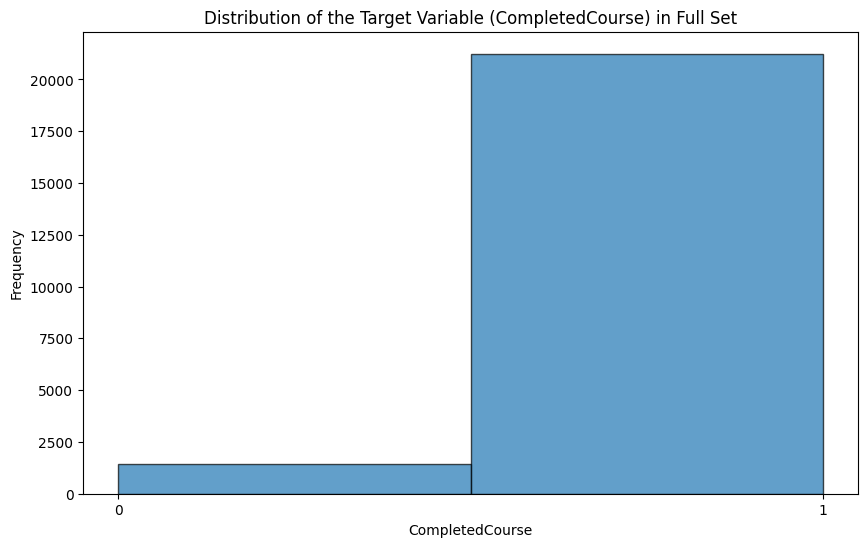

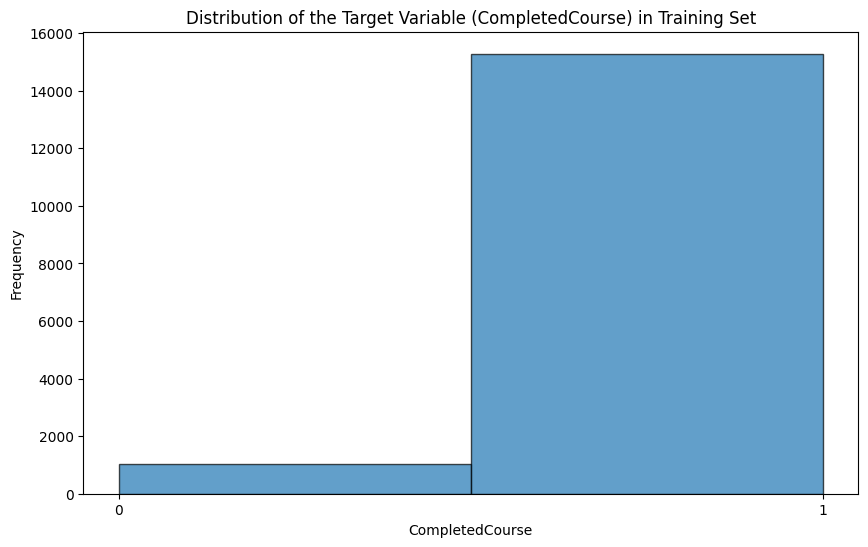

In [ ]:
# Plot histogram for the target variable in the full dataset
plt.figure(figsize=(10, 6))
plt.hist(y, bins=2, edgecolor='k', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('CompletedCourse')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable (CompletedCourse) in Full Set')
plt.show()

# Plot histogram for the target variable in the training set
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=2, edgecolor='k', alpha=0.7)
plt.xticks([0, 1])
plt.xlabel('CompletedCourse')
plt.ylabel('Frequency')
plt.title('Distribution of the Target Variable (CompletedCourse) in Training Set')
plt.show()

**Interpretation:** The data is imbalanced, meaning that machine learning models may perform poorly, especially on the minority class (0 = dropout). This will be taken into account when considering evaluation metrics.

Under-sampling techniques could be explored for all models, depending on their performance.

For specific models:

**XGBoost:** The `scale_pos_weight` parameter could be adjusted to help balance the positive and negative weights.

**Neural Network:** It will be worth exploring the adjustment of class weights in the Neural Network model to penalise misclassifications of the minority class more heavily. This will be considered if the model demonstrates poor performance.



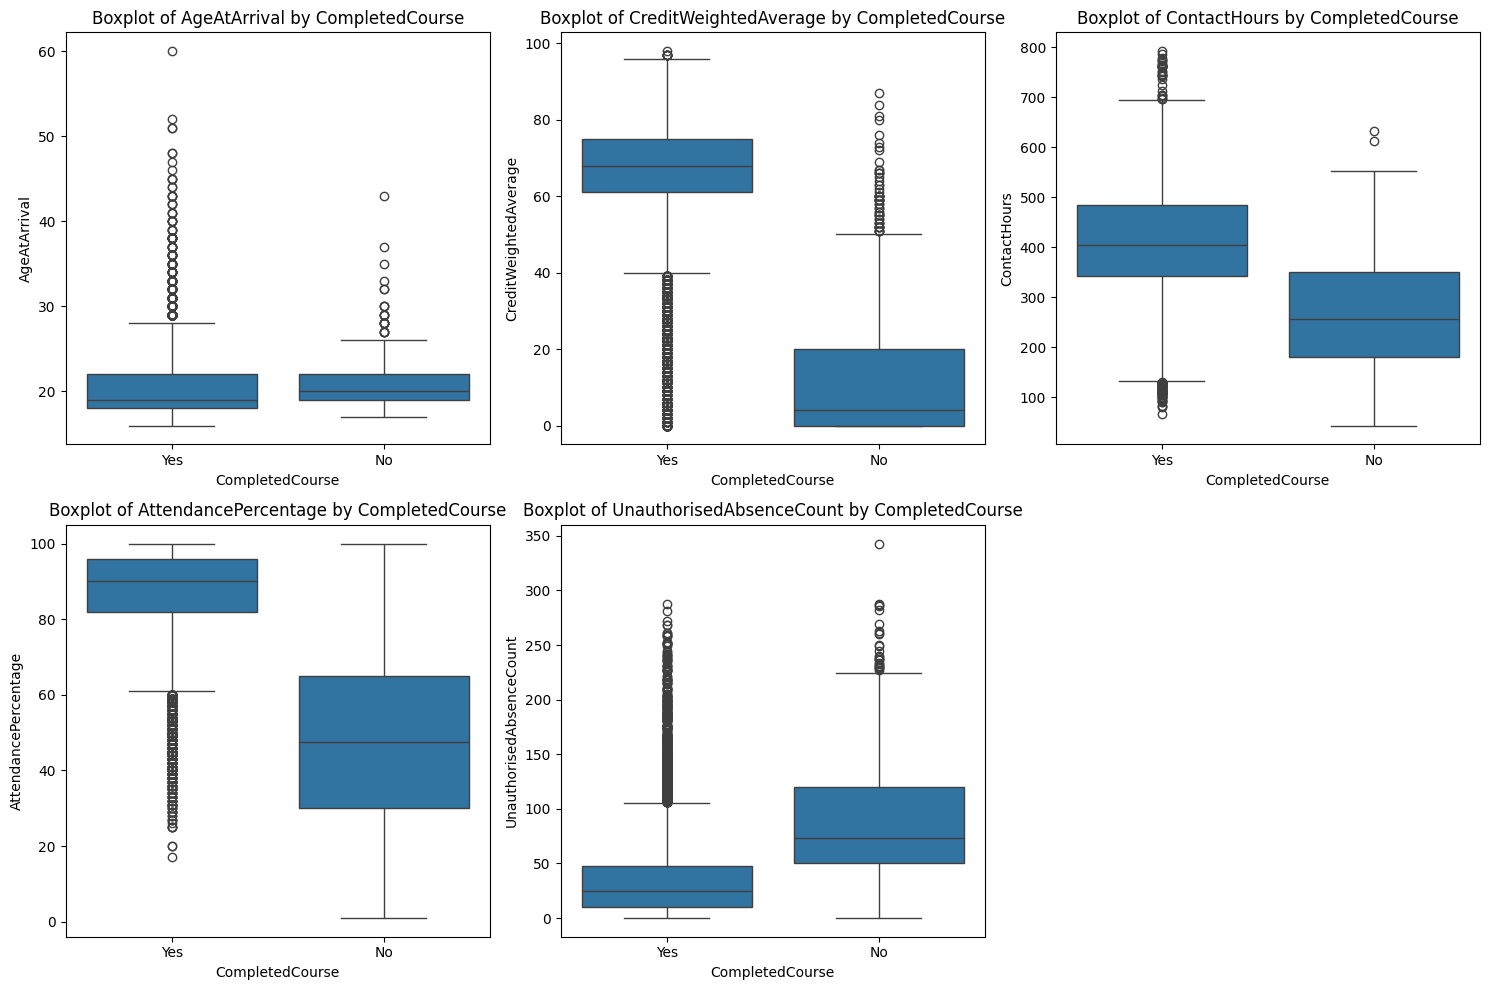

In [ ]:
# Create boxplots for numerical features grouped by the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='CompletedCourse', y=col, data=data)
    plt.title(f'Boxplot of {col} by CompletedCourse')
    plt.xlabel('CompletedCourse')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Comments on the Boxplots:

1. **AgeAtArrival by CompletedCourse**:
   - The age distribution of students who completed the course ("Yes") and those who did not ("No") is quite similar.
   - Both groups have outliers, with the "Yes" group displaying slightly more. This higher frequency of outliers in the "Yes" group could indicate that older candidates, having better clarity of direction when completing a course later in life, are less likely to lose interest and drop out.
   - The boxplots suggest no significant difference between the two groups.

2. **CreditWeightedAverage by CompletedCourse**:
   - Students who completed the course ("Yes") tend to have a higher maximum and median CreditWeightedAverage compared to those who did not ("No").
   - There are outliers in the "No" category with high credit-weighted averages, indicating that these candidates may have dropped out due to personal reasons or loss of interest in the course. As expected, the lower portion has no outliers, as these students are expected to drop out.
   - Conversely, there are several outliers in the "Yes" category on the lower end. This is expected as students who opt to stay on the course are likely driven to obtain a high grade. Any outliers on the lower end will be less common, as poorly performing students will have greater incentive to drop out.

3. **ContactHours by CompletedCourse**:
   - Students who completed the course ("Yes") generally have a higher number of contact hours compared to those who did not ("No"). The "Yes" category has several outliers and has a higher median as well as interquartile ranges and limits.

4. **AttendancePercentage by CompletedCourse**:
   - The attendance percentage is noticeably higher for students who completed the course ("Yes") compared to those who did not ("No").
   - The median attendance for completers is significantly higher, suggesting that higher attendance correlates with course completion.
   - There are several outliers below the bottom whiskers for students who completed the course.

5. **UnauthorisedAbsenceCount by CompletedCourse**:
   - Students who did not complete the course ("No") tend to have a higher count of unauthorised absences compared to those who completed the course ("Yes").
   - There are many outliers in the "No" category with extremely high unauthorised absence counts.
   - The median unauthorised absence count is lower for students who completed the course.

### Summary:
- Overall, the boxplots suggest that higher CreditWeightedAverage, ContactHours, and AttendancePercentage are associated with course completion.
- Higher UnauthorisedAbsenceCount is associated with not completing the course.
- AgeAtArrival does not show a significant difference between the two groups, although there are some outliers in the non-completers.


# 2. Predicting Dropout with XGBoost

In this section, we predict student dropout using the XGBoost model. The datasets X1 and X2 are used for modelling with both the default parameters and compared with hyperparameter-tuned models. The following parameters are included in our parameter grid for optimisation:

- learning_rate: Default is 0.3
- max_depth: Default is 6
- n_estimators: Default is 100

## 2.1 X1 split (excluding AttendancePercentage and UnauthorisedAbsenceCount)

### a) Default Parameters

XGBoost Model with Default Parameters X1 - Accuracy:  0.9702512119876597
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       275
           1       0.98      0.99      0.98      4263

    accuracy                           0.97      4538
   macro avg       0.87      0.86      0.87      4538
weighted avg       0.97      0.97      0.97      4538



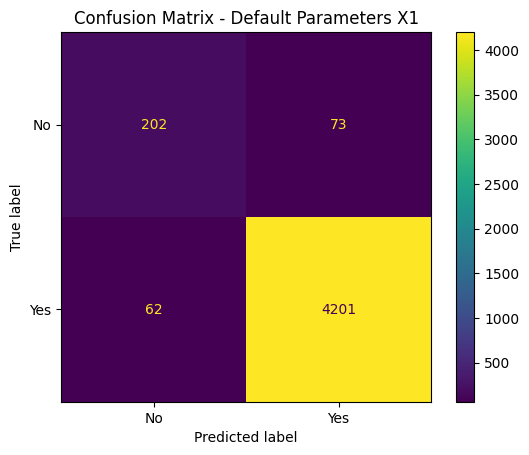

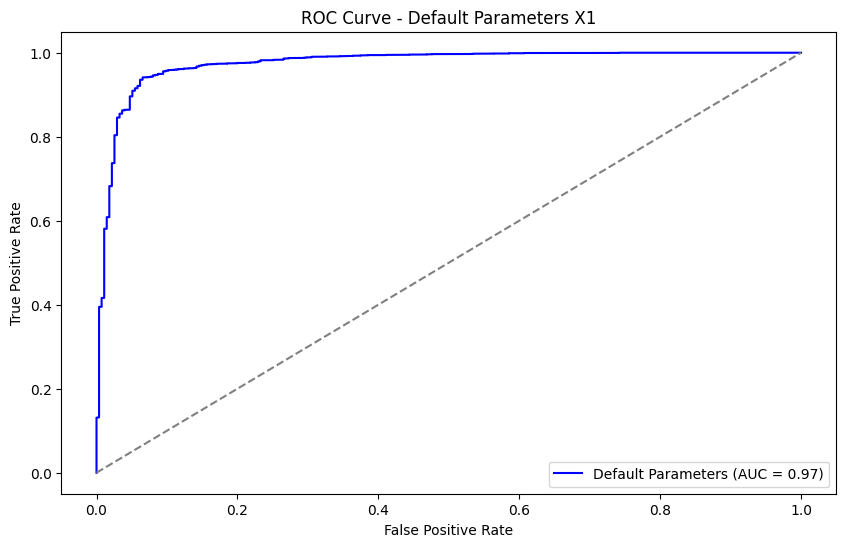

In [ ]:
# Training an XGBoost classifier with default parameters
seed = 42
xg_model_X1 = xgb.XGBClassifier(random_state=seed)
xg_model_X1.fit(X1_train, y_train)

# Model evaluation for default parameters
predictions_default_X1 = xg_model_X1.predict(X1_test)
print("XGBoost Model with Default Parameters X1 - Accuracy: ", accuracy_score(y_test, predictions_default_X1))
print(classification_report(y_test, predictions_default_X1))

# Confusion Matrix for default parameters
cm_default = confusion_matrix(y_test, predictions_default_X1)
cfmd_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=["No","Yes"])
cfmd_default.plot()
plt.title("Confusion Matrix - Default Parameters X1")
plt.show()

# ROC Curve and AUC for default parameters
y_prob_default_X1 = xg_model_X1.predict_proba(X1_test)[:, 1]  # Get the probabilities for the positive class
fpr_default_X1, tpr_default_X1, thresholds_default_X1 = roc_curve(y_test, y_prob_default_X1)
auc_score_default_X1 = roc_auc_score(y_test, y_prob_default_X1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_default_X1, tpr_default_X1, color='blue', label=f'Default Parameters (AUC = {auc_score_default_X1:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Default Parameters X1')
plt.legend(loc="lower right")
plt.show()

#### Interpretation for default parameters

 - The XGBoost model with default parameters shows high accuracy for positive values, with Precision, Recall, and F1-Score all being above 98%. It should be noted that this is likely due to imbalance.
 - Predictions for negative values are less accurate, with 77% Precision, 73% Recall, and an F1-Score of 75%. This is due to the dataset imbalance, with only 275 negative occurrences out of a total of 4538 observations.
 - The ROC curve illustrates the model's ability to distinguish between positive and negative cases, focusing on true positive rates and false positive rates. The AUC score of 0.97 indicates that the model almost perfectly distinguishes between positive and negative cases. However, this high AUC score may be influenced by the data imbalance, as there are relatively few negative observations. This means that although 73 false positive predictions seem small in proportion to true positives, it represents approximately 25% of all negative observations, which is quite significant.
 - While the ROC curve provides a measure of the model’s overall discriminative ability, the detailed precision and recall values for negative cases highlight areas where the model's performance could be improved, particularly in correctly identifying negative cases.

### b) Hyperparameter Tuning
In this section, the adjustment of hyperparameteres will be explored. The following hyperparemeters will be experimented with different values:
- Learning Rate
- Max Depth
- Number of Estimators

F1 will be the scoring metric, given the data is imbalanced and accuracy is less reliable.

### Considerations:

1. **False Positives**: If a student is predicted to drop out but they won’t, you might intervene unnecessarily. The cost here is mainly the resources spent on the intervention.
2. **False Negatives**: If a student is predicted not to drop out but they will, you miss the opportunity to intervene and help the student. This might have more serious implications as you miss the chance to prevent a dropout.
3. **Accuracy:**: Since the dataset is imbalanced, accuracy is not a reliable metric for this analysis.

#### Chosen Score Metric for Hyperparameters
- **F1 Score**: This metric balances precision and recall, providing a good measure when the aim want to balance the cost of false positives and false negatives.
  - **Use Case**: If both types of errors (false positives and false negatives) carry similar costs, the F1 score is a reasonable metric.


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters X1: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best F1 Score X1: 0.9854264998545395
XGBoost Model with Tuned Parameters X1 - Accuracy:  0.9726751873071838
XGBoost Model with Tuned Parameters X1 - F1 Score:  0.9854766924338254
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       275
           1       0.98      0.99      0.99      4263

    accuracy                           0.97      4538
   macro avg       0.89      0.87      0.88      4538
weighted avg       0.97      0.97      0.97      4538



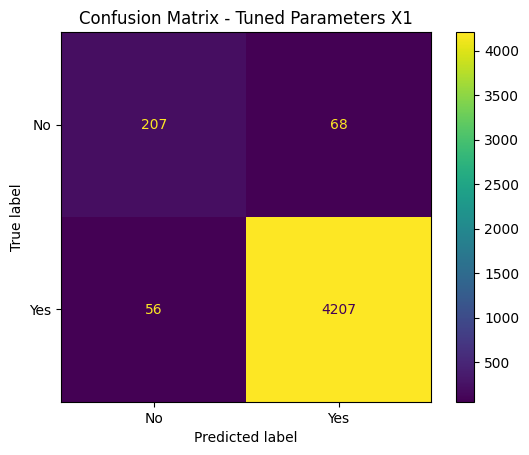

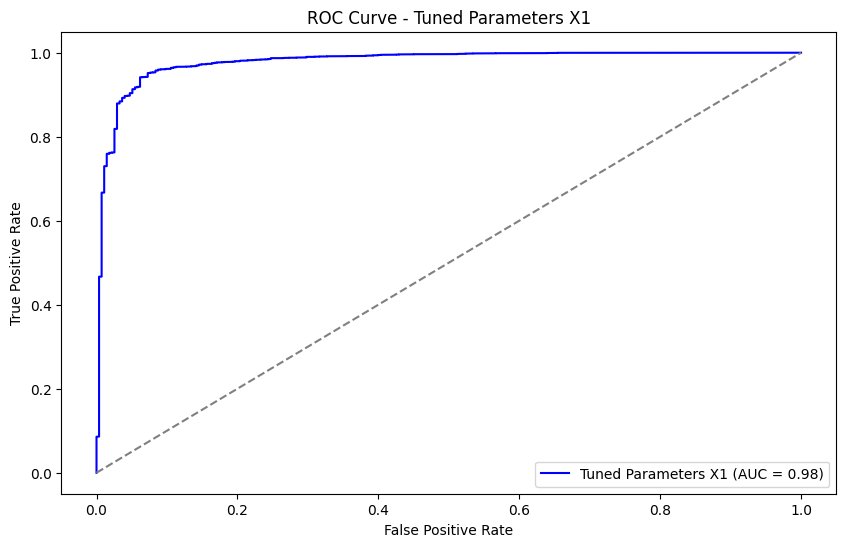

In [ ]:
# Import parallel backends as better suited to multithreaded environments with GridSearch
from sklearn.utils import parallel_backend

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 7, 9],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost classifier
xg_model_X1 = xgb.XGBClassifier(random_state=42)

# Set up grid search with F1 score as the evaluation metric
grid_search = GridSearchCV(estimator=xg_model_X1, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the model with grid search using threading backend
with parallel_backend('threading'):
    grid_search.fit(X1_train, y_train)

# Display the best parameters and best score found by grid search
print("Best Parameters X1:", grid_search.best_params_)
print("Best F1 Score X1:", grid_search.best_score_)

# Use the best parameters to train the final model
best_params_X1 = grid_search.best_params_
final_model_X1 = xgb.XGBClassifier(**best_params_X1, random_state=42)
final_model_X1.fit(X1_train, y_train)

# Model evaluation for tuned parameters
predictions_tuned_X1 = final_model_X1.predict(X1_test)
accuracy_tuned_X1 = accuracy_score(y_test, predictions_tuned_X1)
f1_tuned_X1 = f1_score(y_test, predictions_tuned_X1)
print("XGBoost Model with Tuned Parameters X1 - Accuracy: ", accuracy_tuned_X1)
print("XGBoost Model with Tuned Parameters X1 - F1 Score: ", f1_tuned_X1)
print(classification_report(y_test, predictions_tuned_X1))

# Confusion Matrix for tuned parameters
cm_tuned = confusion_matrix(y_test, predictions_tuned_X1)
cfmd_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=["No","Yes"])
cfmd_tuned.plot()
plt.title("Confusion Matrix - Tuned Parameters X1")
plt.show()

# ROC Curve and AUC for tuned parameters
y_prob_tuned_X1 = final_model_X1.predict_proba(X1_test)[:, 1]
fpr_tuned_X1, tpr_tuned_X1, thresholds_tuned_X1 = roc_curve(y_test, y_prob_tuned_X1)
auc_score_tuned_X1 = roc_auc_score(y_test, y_prob_tuned_X1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_tuned_X1, tpr_tuned_X1, color='blue', label=f'Tuned Parameters X1 (AUC = {auc_score_tuned_X1:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Parameters X1')
plt.legend(loc="lower right")
plt.show()

### c) Compare Default and Tuned

,Model,Accuracy,Precision (No),Recall (No),F1-Score (No),Precision (Yes),Recall (Yes),F1-Score (Yes),AUC Score
0,Default Parameters_X1,0.970251,0.765152,0.734545,0.749536,0.982920,0.985456,0.984186,0.974265
1,Tuned Parameters_X1,0.972675,0.787072,0.752727,0.769517,0.984094,0.986864,0.985477,0.978470


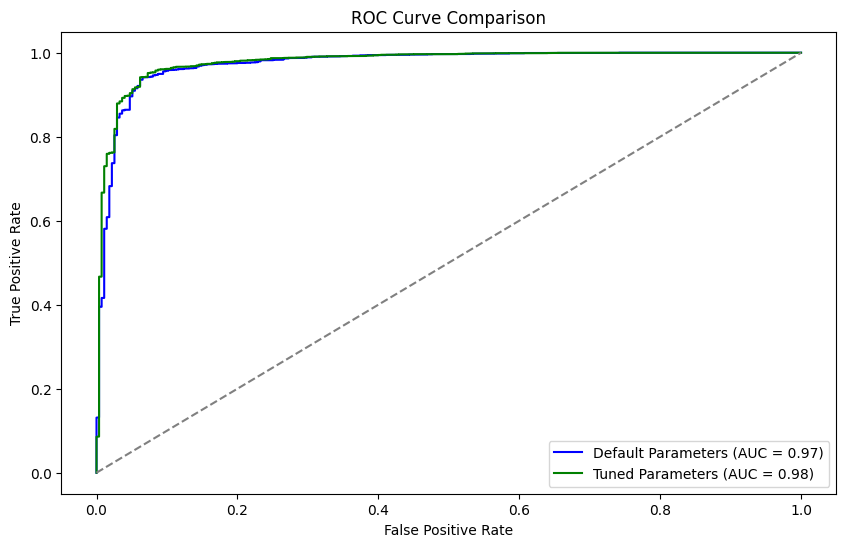

Default Parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
# Collect results for default parameters
results_default_X1 = {
    'Model': 'Default Parameters_X1',
    'Accuracy': accuracy_score(y_test, predictions_default_X1),
    'Precision (No)': classification_report(y_test, predictions_default_X1, output_dict=True)['0']['precision'],
    'Recall (No)': classification_report(y_test, predictions_default_X1, output_dict=True)['0']['recall'],
    'F1-Score (No)': classification_report(y_test, predictions_default_X1, output_dict=True)['0']['f1-score'],
    'Precision (Yes)': classification_report(y_test, predictions_default_X1, output_dict=True)['1']['precision'],
    'Recall (Yes)': classification_report(y_test, predictions_default_X1, output_dict=True)['1']['recall'],
    'F1-Score (Yes)': classification_report(y_test, predictions_default_X1, output_dict=True)['1']['f1-score'],
    'AUC Score': auc_score_default_X1
}

# Collect results for tuned parameters
results_tuned_X1 = {
    'Model': 'Tuned Parameters_X1',
    'Accuracy': accuracy_score(y_test, predictions_tuned_X1),
    'Precision (No)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['0']['precision'],
    'Recall (No)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['0']['recall'],
    'F1-Score (No)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['0']['f1-score'],
    'Precision (Yes)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['1']['precision'],
    'Recall (Yes)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['1']['recall'],
    'F1-Score (Yes)': classification_report(y_test, predictions_tuned_X1, output_dict=True)['1']['f1-score'],
    'AUC Score': auc_score_tuned_X1
}

# Combine results into a DataFrame
results_df = pd.DataFrame([results_default_X1, results_tuned_X1])

# Display the results
display(results_df)

# Plot ROC Curves for comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_default_X1, tpr_default_X1, color='blue', label=f'Default Parameters (AUC = {auc_score_default_X1:.2f})')
plt.plot(fpr_tuned_X1, tpr_tuned_X1, color='green', label=f'Tuned Parameters (AUC = {auc_score_tuned_X1:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print default and best parameters
default_params = {'learning_rate': 0.3, 'max_depth':  6, 'n_estimators': 100}
print("Default Parameters:", default_params)
print("Best Parameters:", grid_search.best_params_)

#### Interpretation of Tuned Parameters

- Among the learning rates, maximum depths, and number of estimator options explored, the model has shown slight improvement.
- The Precision, Recall, and F1 score improved most significantly for the "No" category, with increases of approximately 1.5-2% for each metric. The "Yes" category saw minimal improvement, indicating that the default parameters were sufficiently effective due to the ample supply of data. This is reflected in the overall accuracy, given the data's imbalance favouring the "Yes" category.
- To address the imbalance, strategies such as stratifying or undersampling the "Yes" category could be considered. However, this is beyond the scope of this activity.

## 2.2 X2 split (including AttendancePercentage and UnauthorisedAbsenceCount)

### a) Compare Default and Tuned

In [ ]:
# Function to obtain predictions and metrics
def evaluate_model(X_train, X_test, y_train, y_test, model_name, params=None):
    best_params = None

    if params is None:
        model = xgb.XGBClassifier(random_state=42)
        model.fit(X_train, y_train)
    else:
        model = xgb.XGBClassifier(random_state=42)
        grid_search = GridSearchCV(estimator=model, param_grid=params,
                                   scoring='f1', cv=5, verbose=1, n_jobs=-1)
        with parallel_backend('threading'):
            grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best Parameters for {model_name}:", best_params)

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"{model_name} - Accuracy: {accuracy}")
    print(f"{model_name} - F1 Score: {f1}")
    print(classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions)
    cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
    cfmd.plot()
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return model, predictions, fpr, tpr, y_prob, auc_score, best_params

In [ ]:
# Initiate empty results list
results = []

# Append X1 results for later comparison
results.append((predictions_default_X1, auc_score_default_X1, fpr_default_X1, tpr_default_X1))
results.append((predictions_tuned_X1, auc_score_tuned_X1, fpr_tuned_X1, tpr_tuned_X1))

Default Parameters X2 - Accuracy: 0.9821507271925959
Default Parameters X2 - F1 Score: 0.9905052162700738
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       275
           1       0.99      0.99      0.99      4263

    accuracy                           0.98      4538
   macro avg       0.92      0.92      0.92      4538
weighted avg       0.98      0.98      0.98      4538



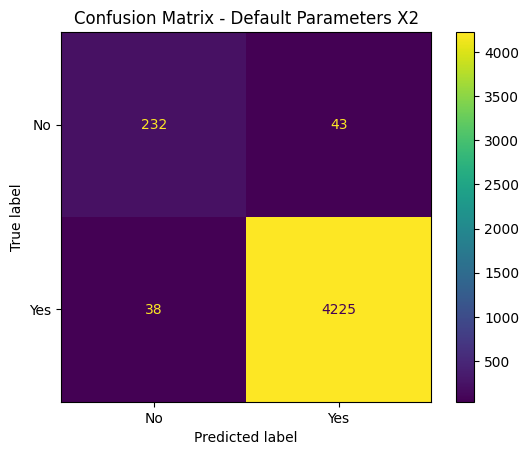

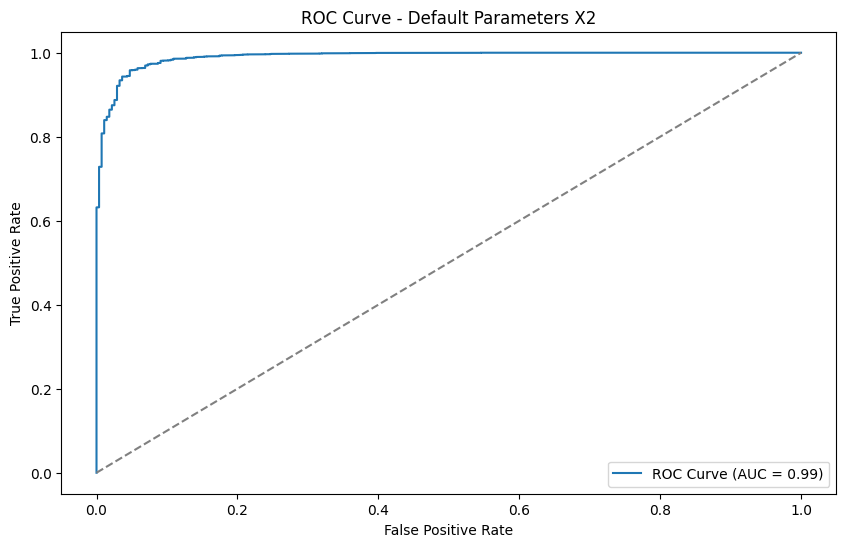

In [ ]:
# Evaluate X2 default
model_default_X2, predictions_default_X2, fpr_default_X2, tpr_default_X2, y_prob_default_X2, auc_score_default_X2, _ = evaluate_model(X2_train, X2_test, y_train, y_test, "Default Parameters X2")
results.append((predictions_default_X2, auc_score_default_X2, fpr_default_X2, tpr_default_X2))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters for Tuned Parameters X2: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Tuned Parameters X2 - Accuracy: 0.9814896430145439
Tuned Parameters X2 - F1 Score: 0.9901639344262295
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       275
           1       0.99      0.99      0.99      4263

    accuracy                           0.98      4538
   macro avg       0.93      0.91      0.92      4538
weighted avg       0.98      0.98      0.98      4538



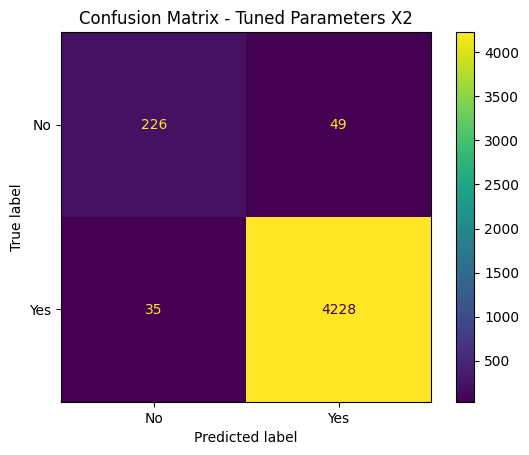

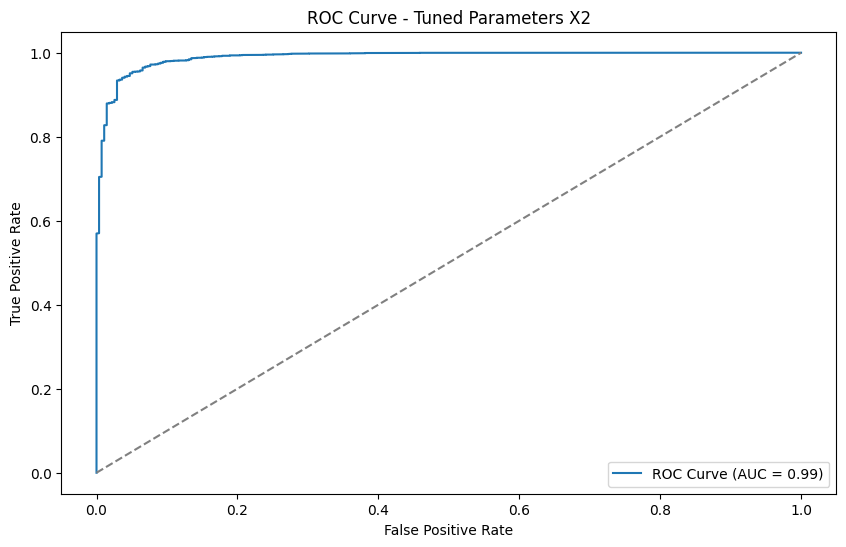

In [ ]:
# Evaluate X2 tuned
model_tuned_X2, predictions_tuned_X2, fpr_tuned_X2, tpr_tuned_X2, y_prob_tuned_X2, auc_score_tuned_X2, best_params_X2 = evaluate_model(X2_train, X2_test, y_train, y_test, "Tuned Parameters X2", params=param_grid)
results.append((predictions_tuned_X2, auc_score_tuned_X2, fpr_tuned_X2, tpr_tuned_X2))

## b) Compare all models

In [ ]:
# Combine results into a DataFrame
results_list = []
for model_name, (predictions, auc_score, fpr, tpr) in zip(
        ["Default Parameters X1", "Tuned Parameters X1", "Default Parameters X2", "Tuned Parameters X2"], results):
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision (No)': classification_report(y_test, predictions, output_dict=True)['0']['precision'],
        'Recall (No)': classification_report(y_test, predictions, output_dict=True)['0']['recall'],
        'F1-Score (No)': classification_report(y_test, predictions, output_dict=True)['0']['f1-score'],
        'Precision (Yes)': classification_report(y_test, predictions, output_dict=True)['1']['precision'],
        'Recall (Yes)': classification_report(y_test, predictions, output_dict=True)['1']['recall'],
        'F1-Score (Yes)': classification_report(y_test, predictions, output_dict=True)['1']['f1-score'],
        'AUC Score': auc_score
    })

results_df = pd.DataFrame(results_list)

In [ ]:
# Display the results
print("Model Comparison Results:")
display(results_df)

Model Comparison Results:


,Model,Accuracy,Precision (No),Recall (No),F1-Score (No),Precision (Yes),Recall (Yes),F1-Score (Yes),AUC Score
0,Default Parameters X1,0.970251,0.765152,0.734545,0.749536,0.982920,0.985456,0.984186,0.974265
1,Tuned Parameters X1,0.972675,0.787072,0.752727,0.769517,0.984094,0.986864,0.985477,0.978470
2,Default Parameters X2,0.982151,0.859259,0.843636,0.851376,0.989925,0.991086,0.990505,0.990208
3,Tuned Parameters X2,0.981490,0.865900,0.821818,0.843284,0.988543,0.991790,0.990164,0.989515


In [ ]:
# Print the best parameters separately
print(f"Default Parameters:                      {default_params}")
print(f"Best Parameters for Tuned Parameters X1: {best_params_X1}")
print(f"Best Parameters for Tuned Parameters X2: {best_params_X2}")

Default Parameters:                      {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}
Best Parameters for Tuned Parameters X1: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Parameters for Tuned Parameters X2: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


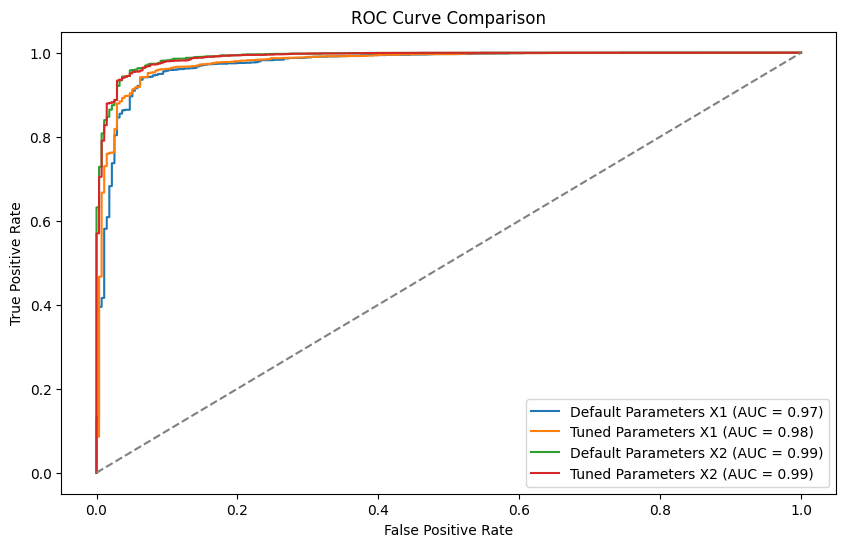

In [ ]:
# Plot ROC Curves for comparison
plt.figure(figsize=(10, 6))
for model_name, (predictions, auc_score, fpr, tpr) in zip(
        ["Default Parameters X1", "Tuned Parameters X1", "Default Parameters X2", "Tuned Parameters X2"], results):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


### Interpretation

- Adding AttendancePercentage and UnauthorisedAbsenceCount improved all metrics, particularly for the "No" category, enhancing Precision, Recall, and F1 Score.
- These features aid in better predicting "No" values, indicating a link between low attendance, unauthorised absences, and higher dropout rates.
- Accuracy slightly improved for both X2 models but remains unreliable for imbalanced datasets.
- In the tuned X2 model, precision for the "No" category improved, but recall decreased slightly, resulting in an increase in false negatives while maintaining the overall F1 Score.
- The slight decrease in overall accuracy for the tuned X2 model suggests possible overfitting due to a higher number of estimators.
- XGBoost, while robust, still requires careful tuning to prevent overfitting.
- AUC scores were consistent across all models, indicating strong class distinction, though influenced by class imbalance.
- Using PR-AUC may better emphasize positive class performance in such datasets.

## c) Feature Importance
Given Default Parameters X2 has the best performance, feature importance will be carried on this model. For visual purposes, only the top 20 will be shown.

                                              Feature  Importance
0                               CreditWeightedAverage    0.330621
10                            CentreName_ISC_Kingston    0.064805
8                              CentreName_ISC_Holland    0.045238
22                            CentreName_ISC_Teesside    0.037764
18                           CentreName_ISC_Sheffield    0.036993
..                                                ...         ...
41  ProgressionUniversity_Holland ISC - Hanze UAS/...    0.000000
42  ProgressionUniversity_Holland ISC - Tilburg Un...    0.000000
43  ProgressionUniversity_Holland ISC - Tilburg Un...    0.000000
44   ProgressionUniversity_Holland ISC - VU Amsterdam    0.000000
35  ProgressionUniversity_Holland ISC - Erasmus Un...    0.000000

[66 rows x 2 columns]


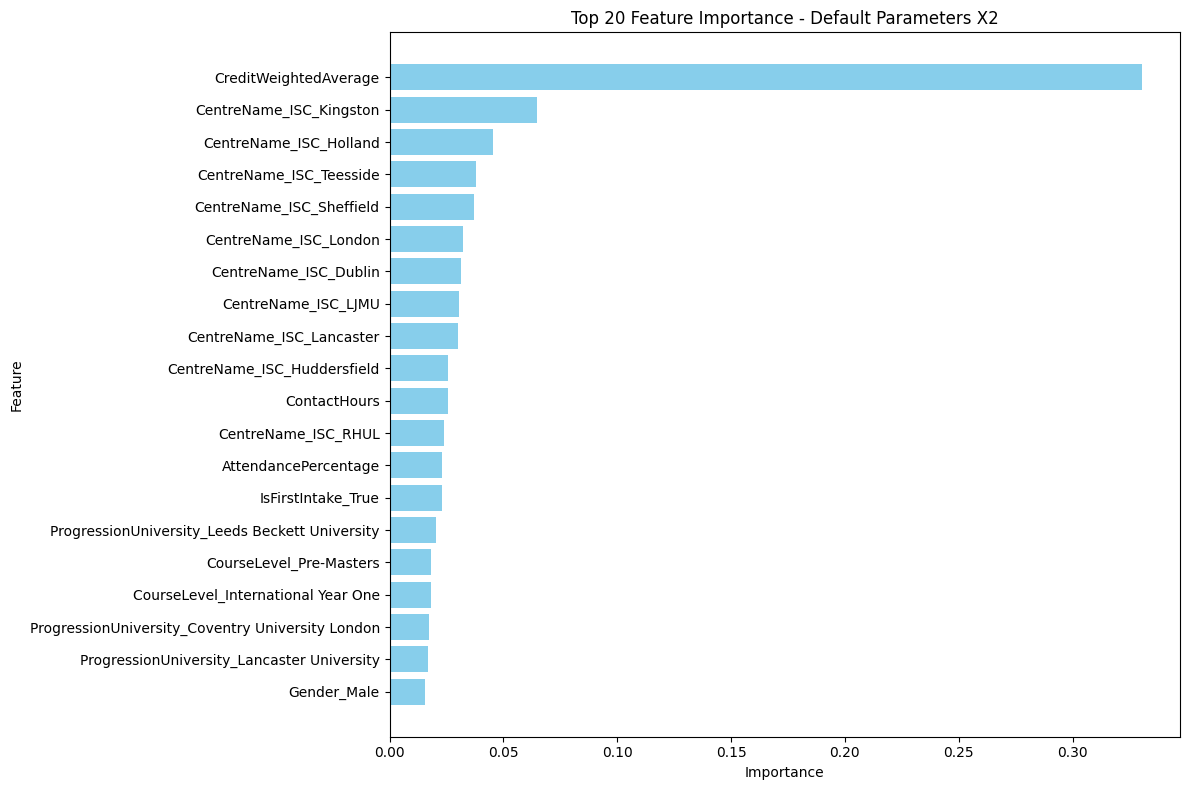

In [ ]:
# Feature importance
importances = model_default_X2.feature_importances_
features = X2_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Limit the number of features to display
top_n = 20
top_features = feature_importance_df.head(top_n)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance - Default Parameters X2')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### Interpretation

1. **CreditWeightedAverage**:
   - This feature is the most significant, with a considerably higher importance score than all other features. This indicates that the average weighted credit score is a crucial factor in predicting student dropout rates. Students with higher average weighted credits are less likely to drop out.

2. **CentreName_ISC_Kingston**:
   - The second most important feature is the centre name for ISC Kingston. This suggests that the centre location has a significant impact on dropout rates, potentially due to differences in resources, support, or student demographics.

3. **CentreName_ISC_Holland, ISC_Teesside, ISC_Sheffield, ISC_London, ISC_Dublin, ISC_LJMU, ISC_Lancaster, ISC_Huddersfield, ISC_RHUL**:
   - Similar to Kingston, these features highlight that the specific centre names are important predictors. Each centre has its unique impact on dropout likelihood, possibly due to varying quality of education, support systems, and local factors.

4. **Remaining Top 20 Features**:
   - These features have a lower but still notable importance. They indicate that factors such as the number of contact hours, attendance percentage, whether the student is in their first intake, the progression university, course level, and gender also play roles in predicting dropout rates. These variables collectively contribute to understanding the broader context of student retention.

### Recommendations to Study Group

A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall satisfaction. Based on the XGBoost model, the following targeted actions are recommended to minimise the dropout rate, maximize revenue, maintain and/or improve Study Group's reputation, and enhance student satisfaction:

1. **Enhance Academic Support:**
   - Focus on improving academic performance, as CreditWeightedAverage is the most significant predictor. Implement enhanced tutoring services, study groups, and academic support programs to help students maintain high credit-weighted averages.

2. **Strengthen Centre-Specific Support:**
   - Investigate the unique challenges and strengths of each centre, especially those like CentreName_ISC_Kingston that significantly impact dropout rates. Tailor support services accordingly and provide additional resources where needed, such as mental health support and career counselling.

3. **Promote Attendance and Engagement:**
   - Develop programs that encourage regular attendance and active participation, given the importance of AttendancePercentage and ContactHours. Implement mandatory attendance policies, engaging classroom activities, and provide incentives for consistent attendance.

4. **Support First Intake Students:**
   - Implement targeted support for students in their first intake (IsFirstIntake_True) to help reduce dropout rates. Orientation programs and continuous mentoring for new students can aid their transition and improve retention.

5. **Monitor and Share Best Practices:**
   - Regularly monitor performance across all centres and identify best practices from centres with lower dropout rates. Standardize and share these practices to improve retention rates uniformly.

### Additional Insights
- CreditWeightedAverage has significantly greater importance in predicting dropout rates. Centres like ISC_Kingston also play a crucial role.
- Prioritise actions related to these features and conduct further investigations to understand whether these centres have a positive or negative influence on dropout rates.
- Lower CreditWeightedAverages correlate with higher dropout rates, underscoring the need for academic support initiatives.

By focusing on these key areas, Study Group can enhance student retention rates, ensuring that students receive the necessary support to succeed academically and stay enrolled.

# 3. Prediction of dropout using Neural Networks

Given the imbalanced dataset, accuracy is less reliable. The F1 score, balancing precision and recall, is used for both XGBoost and Neural Network models for consistency. Since TensorFlow/Keras lacks a built-in F1 score, A custom metric is implemented to ensure consistency between models.

In [ ]:
# Install the keras-tuner library
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Import relevant libraries
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
import keras_tuner as kt
import os
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np

### a) Define Functions

In [ ]:
# Ensure Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Define base directory for checkpoints
base_dir = '/content/drive/My Drive/student_dropout_tuning'
os.makedirs(base_dir, exist_ok=True)

# Ensure your Google Drive is mounted
drive.mount('/content/drive', force_remount=True)

# Define base directory for checkpoints
base_dir = '/content/drive/My Drive/student_dropout_tuning'
os.makedirs(base_dir, exist_ok=True)

# Function to set the seed for reproducibility
def set_seed(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# Define custom F1 score metric
def custom_f1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    return 2 * ((precision_value * recall_value) / (precision_value + recall_value + K.epsilon()))

# Ensure the input data is properly formatted
def ensure_data_format(X_train, y_train, X_val, y_val, X_test, y_test):
    X_train = np.array(X_train, dtype=np.float32)
    y_train = np.array(y_train, dtype=np.int32)
    X_val = np.array(X_val, dtype=np.float32)
    y_val = np.array(y_val, dtype=np.int32)
    X_test = np.array(X_test, dtype=np.float32)
    y_test = np.array(y_test, dtype=np.int32)
    return X_train, y_train, X_val, y_val, X_test, y_test

# Function to build the model with initial parameters
def build_initial_model(input_dim, initial_params):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(initial_params['neurons'], activation=initial_params['activation'], kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(initial_params['neurons'] // 2, activation=initial_params['activation'], kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=initial_params['optimizer'], loss='binary_crossentropy', metrics=[custom_f1_score])
    return model

# Function to train and save model with initial parameters
def train_initial_model(X_train, y_train, X_val, y_val, X_test, y_test, initial_params, model_name, epochs):
    set_seed(42)  # Set the seed for reproducibility
    X_train, y_train, X_val, y_val, X_test, y_test = ensure_data_format(X_train, y_train, X_val, y_val, X_test, y_test)
    input_dim = X_train.shape[1]
    model = build_initial_model(input_dim, initial_params)

    # Early stopping and checkpoint callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint_path = os.path.join(base_dir, f'best_initial_model_{model_name}.h5')
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
    print(f"Checkpoint path: {checkpoint_path}")

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=32,
                        callbacks=[early_stopping, checkpoint],
                        verbose=1)

    # Save the best model
    model.save(checkpoint_path)

    # Load the best model
    best_model = tf.keras.models.load_model(checkpoint_path, custom_objects={'custom_f1_score': custom_f1_score})

    # Evaluate the model on test data
    loss, f1 = best_model.evaluate(X_test, y_test, verbose=0)
    print(f"Loss: {loss}, F1-Score: {f1}")

    # Predict probabilities and classes
    y_pred_nn_prob = best_model.predict(X_test)
    y_pred_nn = (y_pred_nn_prob > 0.5).astype("int32")

    # Calculate metrics
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
    precision_nn = precision_score(y_test, y_pred_nn)
    recall_nn = recall_score(y_test, y_pred_nn)
    f1_nn = f1_score(y_test, y_pred_nn)
    auc_nn = roc_auc_score(y_test, y_pred_nn_prob)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_nn_prob)

    # Collect results
    results = {
        'Model': f'Initial Model {model_name}',
        'Loss': loss,
        'F1-Score': f1,
        'Accuracy': accuracy_nn,
        'Precision': precision_nn,
        'Recall': recall_nn,
        'F1-Score (Custom)': f1_nn,
        'AUC': auc_nn
    }

    return best_model, results, history.history, conf_matrix_nn, y_pred_nn_prob, fpr, tpr

# Simple model builder function for KerasTuner
def build_tuning_model(hp, input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation=hp.Choice('activation', ['relu', 'tanh']), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=[custom_f1_score])
    return model

# Initialize Keras Tuner with GridSearch
def tune_model(X_train, y_train, X_val, y_val, X_test, y_test, model_name, epochs):
    set_seed(42)  # Set the seed for reproducibility
    X_train, y_train, X_val, y_val, X_test, y_test = ensure_data_format(X_train, y_train, X_val, y_val, X_test, y_test)
    input_dim = X_train.shape[1]
    tuner = kt.GridSearch(
        lambda hp: build_tuning_model(hp, input_dim),
        objective=kt.Objective('val_custom_f1_score', direction='max'),  # Optimize using custom F1 score
        max_trials=5,
        executions_per_trial=1,
        directory=base_dir,
        project_name=f'tuning_experiment_{model_name}'
    )

    # Early stopping and checkpoint callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint_path = os.path.join(base_dir, f'best_tuning_model_{model_name}.h5')
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
    print(f"Checkpoint path: {checkpoint_path}")

    # Run the hyperparameter search
    tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])

    # Get the best model
    best_model = tuner.get_best_models(num_models=1)[0]

    # Save the best model
    best_model.save(checkpoint_path)

    # Load the best model
    best_model = tf.keras.models.load_model(checkpoint_path, custom_objects={'custom_f1_score': custom_f1_score})

    # Retrain the best model to obtain history
    history = best_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=epochs,
                             batch_size=32,
                             callbacks=[early_stopping],
                             verbose=1)

    # Evaluate the model on test data
    loss, f1 = best_model.evaluate(X_test, y_test, verbose=0)
    print(f"Loss: {loss}, F1-Score: {f1}")

    # Predict probabilities and classes
    y_pred_nn_prob = best_model.predict(X_test)
    y_pred_nn = (y_pred_nn_prob > 0.5).astype("int32")

    # Calculate metrics
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
    precision_nn = precision_score(y_test, y_pred_nn)
    recall_nn = recall_score(y_test, y_pred_nn)
    f1_nn = f1_score(y_test, y_pred_nn)
    auc_nn = roc_auc_score(y_test, y_pred_nn_prob)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_nn_prob)

    # Collect results
    results = {
        'Model': f'Tuned Model {model_name}',
        'Loss': loss,
        'F1-Score': f1,
        'Accuracy': accuracy_nn,
        'Precision': precision_nn,
        'Recall': recall_nn,
        'F1-Score (Custom)': f1_nn,
        'AUC': auc_nn
    }

    return best_model, results, history.history, tuner, conf_matrix_nn, y_pred_nn_prob, fpr, tpr

# Function to plot training and validation loss with model name
def plot_metrics(history, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curves - {model_name}')
    plt.legend(loc='upper right')
    plt.show()

# Function to plot ROC curve
def plot_roc(y_test, y_pred_nn_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_nn_prob)
    auc = roc_auc_score(y_test, y_pred_nn_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Function to run initial models
def run_initial_model(X_train, y_train, X_val, y_val, X_test, y_test, initial_params, model_name, epochs):
    return train_initial_model(X_train, y_train, X_val, y_val, X_test, y_test, initial_params, model_name, epochs)

# Function to run tuned models
def run_tuned_model(X_train, y_train, X_val, y_val, X_test, y_test, model_name, epochs):
    return tune_model(X_train, y_train, X_val, y_val, X_test, y_test, model_name, epochs)

# Combine results into a DataFrame
def create_results_dataframe(results_list):
    results_df_list = []
    for result in results_list:
        model_info = result[1]
        results_df_list.append(model_info)
    results_df = pd.DataFrame(results_df_list)
    return results_df

# Extract best hyperparameters from tuned models and create a summary table
def create_hyperparameters_table(tuners_list, model_names):
    hyperparameters_list = []
    for tuner, model_name in zip(tuners_list, model_names):
        best_hp = tuner.get_best_hyperparameters()[0]
        hp_dict = best_hp.values
        hp_dict['Model'] = model_name
        hyperparameters_list.append(hp_dict)
    hyperparameters_df = pd.DataFrame(hyperparameters_list)
    return hyperparameters_df

Mounted at /content/drive
Mounted at /content/drive


### C) Run X1 Models

#### i) Initial Parameters

In [ ]:
# Define initial parameters
initial_params = {
    'neurons': 64,
    'activation': 'relu',
    'optimizer': 'adam'
}

# Ensure input data is properly formatted for X1 and y
X1_train = np.array(X1_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
X1_val = np.array(X1_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.int32)
X1_test = np.array(X1_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)

In [ ]:
# Run the initial model for X1
results_X1_initial = run_initial_model(X1_train, y_train, X1_val, y_val, X1_test, y_test, initial_params, "X1", epochs = 100)


Checkpoint path: /content/drive/My Drive/student_dropout_tuning/best_initial_model_X1.h5
Epoch 1/100
511/511 [==============================] - ETA: 0s - loss: 0.9109 - custom_f1_score: 0.9092

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


511/511 [==============================] - 9s 8ms/step - loss: 0.9109 - custom_f1_score: 0.9092 - val_loss: 0.3807 - val_custom_f1_score: 0.9840
Epoch 2/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3353 - custom_f1_score: 0.9740 - val_loss: 0.1995 - val_custom_f1_score: 0.9856
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.2005 - custom_f1_score: 0.9778 - val_loss: 0.1391 - val_custom_f1_score: 0.9844
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1566 - custom_f1_score: 0.9782 - val_loss: 0.1142 - val_custom_f1_score: 0.9858
Epoch 5/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1316 - custom_f1_score: 0.9786 - val_loss: 0.1010 - val_custom_f1_score: 0.9858
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1156 - custom_f1_score: 0.9813 - val_loss: 0.1010 - val_custom_f1_score: 0.9855
Epoch 7/100
511/511 [==============================] - 2s 5ms/step - l

Results for Initial Model X1: {'Model': 'Initial Model X1', 'Loss': 0.09194270521402359, 'F1-Score': 0.983692467212677, 'Accuracy': 0.9698104892022917, 'Precision': 0.9808857808857809, 'Recall': 0.9870982875908985, 'F1-Score (Custom)': 0.9839822284578511, 'AUC': 0.9768170089352355}


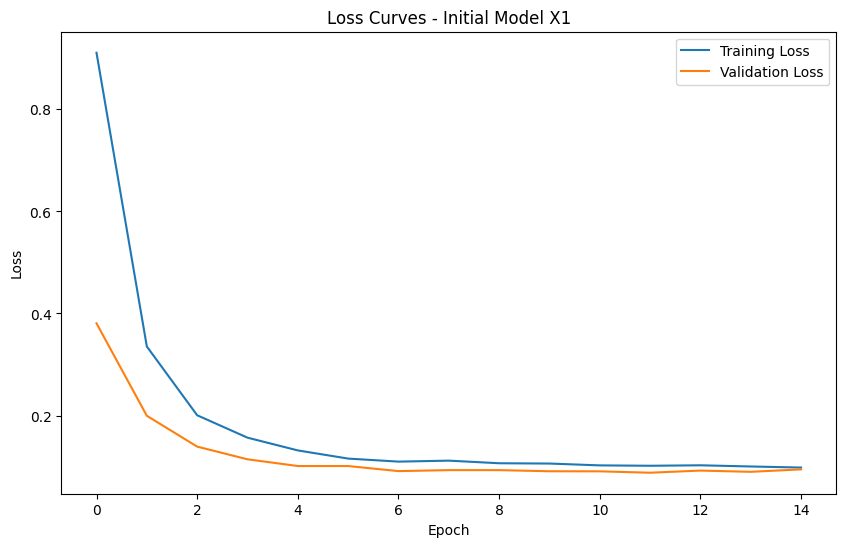

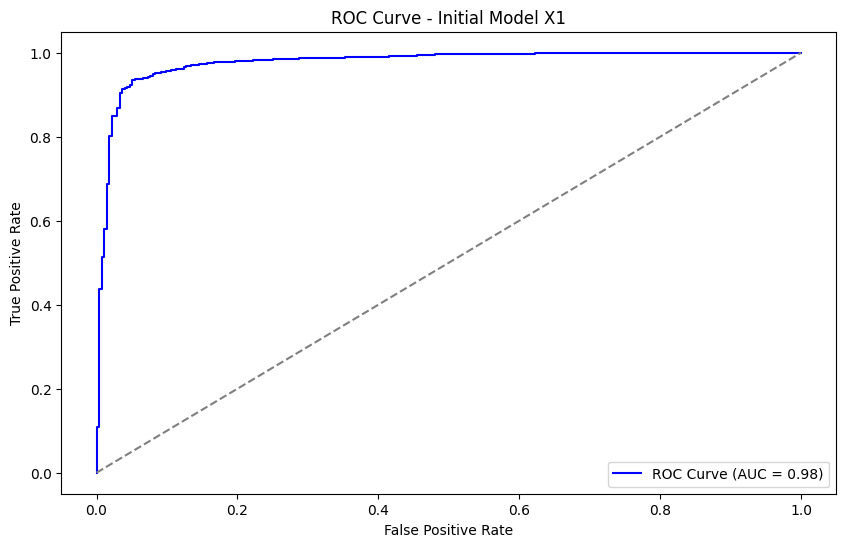

In [ ]:
# Plot results for X1 initial model
print(f"Results for Initial Model X1: {results_X1_initial[1]}")
plot_metrics(results_X1_initial[2], "Initial Model X1")
plot_roc(y_test, results_X1_initial[4], "Initial Model X1")

#### ii) Tuned Parameters

In [ ]:
# Run the tuned model for X1
results_X1_tuned = run_tuned_model(X1_train, y_train, X1_val, y_val, X1_test, y_test, "X1", epochs = 100)

Reloading Tuner from /content/drive/My Drive/student_dropout_tuning/tuning_experiment_X1/tuner0.json
Checkpoint path: /content/drive/My Drive/student_dropout_tuning/best_tuning_model_X1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100


511/511 [==============================] - 3s 4ms/step - loss: 0.2780 - custom_f1_score: 0.9692 - val_loss: 0.1154 - val_custom_f1_score: 0.9839
Epoch 2/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1241 - custom_f1_score: 0.9803 - val_loss: 0.0980 - val_custom_f1_score: 0.9849
Epoch 3/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1114 - custom_f1_score: 0.9808 - val_loss: 0.0917 - val_custom_f1_score: 0.9834
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1072 - custom_f1_score: 0.9810 - val_loss: 0.0891 - val_custom_f1_score: 0.9848
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0994 - custom_f1_score: 0.9818 - val_loss: 0.0863 - val_custom_f1_score: 0.9855
Epoch 6/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0962 - custom_f1_score: 0.9825 - val_loss: 0.0895 - val_custom_f1_score: 0.9853
Epoch 7/100
511/511 [==============================] - 2s 4ms/step - l

Results for Tuned Model X1: {'Model': 'Tuned Model X1', 'Loss': 0.09024418145418167, 'F1-Score': 0.982940137386322, 'Accuracy': 0.9684883208461877, 'Precision': 0.9826616682286785, 'Recall': 0.983814215341309, 'F1-Score (Custom)': 0.9832376040323526, 'AUC': 0.9755720470006184}


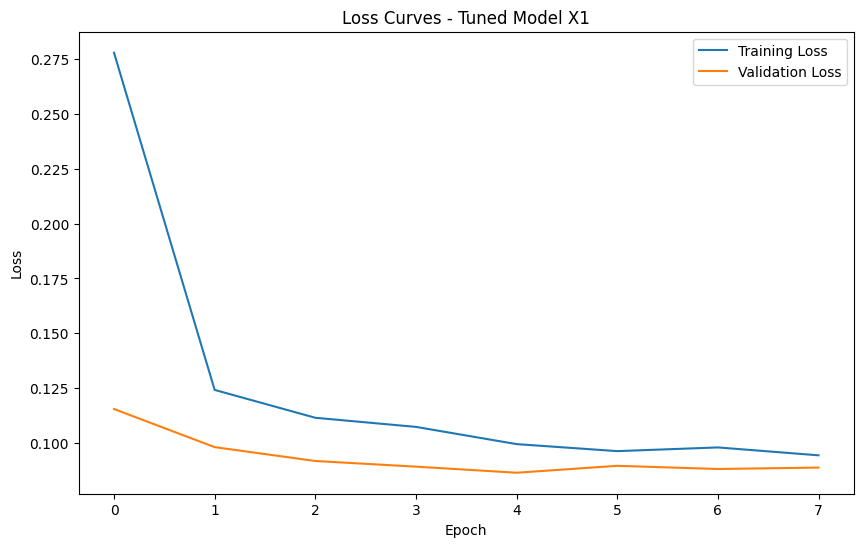

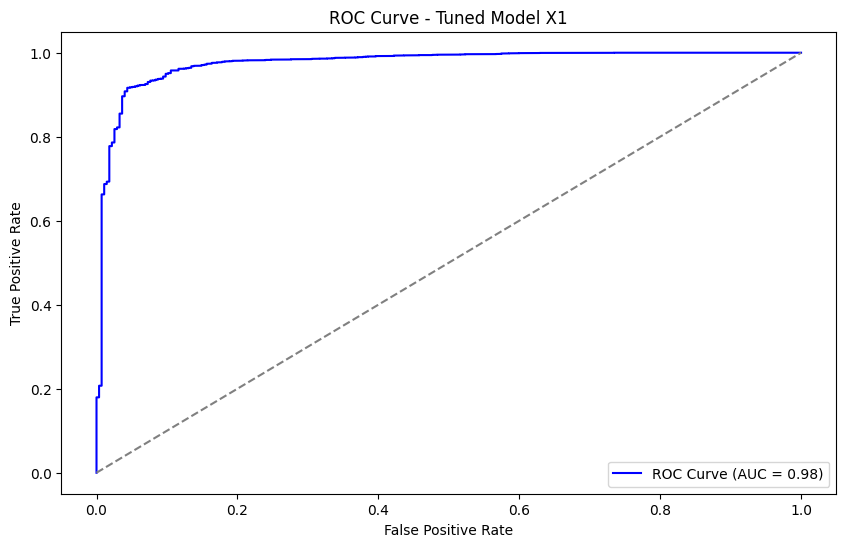

In [ ]:
# Plot results for X1 tuned model
print(f"Results for Tuned Model X1: {results_X1_tuned[1]}")
plot_metrics(results_X1_tuned[2], "Tuned Model X1")
plot_roc(y_test, results_X1_tuned[5], "Tuned Model X1")

### D) Run X2 Models

#### i) Initial Parameters

In [ ]:
# Ensure input data is properly formatted for X2
X2_train = np.array(X2_train, dtype=np.float32)
X2_val = np.array(X2_val, dtype=np.float32)
X2_test = np.array(X2_test, dtype=np.float32)

# Run the initial model for X2
results_X2_initial = run_initial_model(X2_train, y_train, X2_val, y_val, X2_test, y_test, initial_params, "X2", epochs = 100)

Checkpoint path: /content/drive/My Drive/student_dropout_tuning/best_initial_model_X2.h5
Epoch 1/100
502/511 [============================>.] - ETA: 0s - loss: 0.8920 - custom_f1_score: 0.9133

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


511/511 [==============================] - 5s 6ms/step - loss: 0.8847 - custom_f1_score: 0.9146 - val_loss: 0.3604 - val_custom_f1_score: 0.9851
Epoch 2/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3142 - custom_f1_score: 0.9770 - val_loss: 0.1901 - val_custom_f1_score: 0.9851
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1842 - custom_f1_score: 0.9810 - val_loss: 0.1317 - val_custom_f1_score: 0.9854
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1415 - custom_f1_score: 0.9814 - val_loss: 0.1100 - val_custom_f1_score: 0.9856
Epoch 5/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1196 - custom_f1_score: 0.9816 - val_loss: 0.0987 - val_custom_f1_score: 0.9864
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1061 - custom_f1_score: 0.9837 - val_loss: 0.0936 - val_custom_f1_score: 0.9862
Epoch 7/100
511/511 [==============================] - 2s 5ms/step - l

Results for Initial Model X2: {'Model': 'Initial Model X2', 'Loss': 0.08007065206766129, 'F1-Score': 0.9869992136955261, 'Accuracy': 0.9759806081974438, 'Precision': 0.983923578751165, 'Recall': 0.9906169364297444, 'F1-Score (Custom)': 0.9872589129164232, 'AUC': 0.9852267929115219}


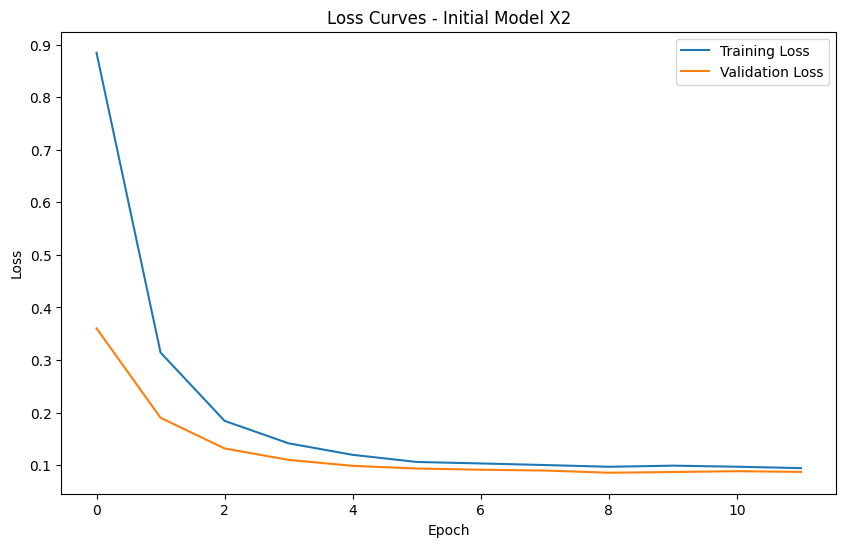

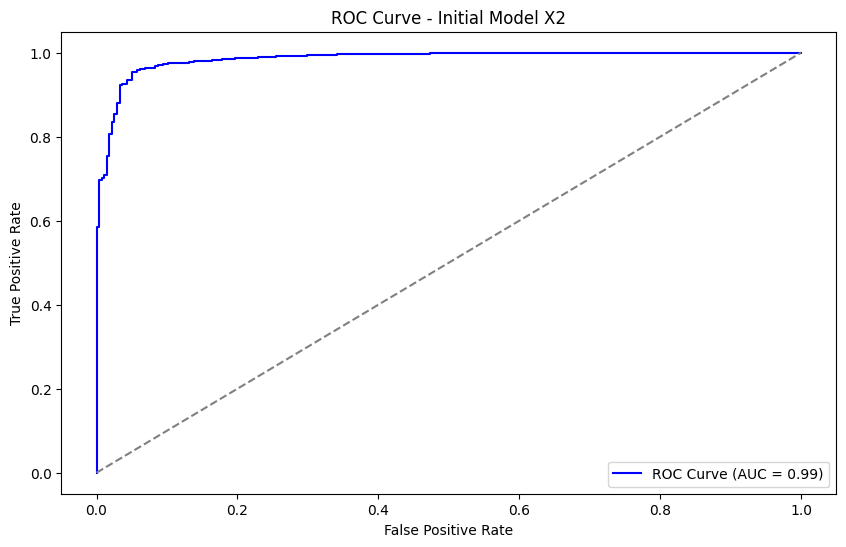

In [ ]:
# Plot results for X2 initial model
print(f"Results for Initial Model X2: {results_X2_initial[1]}")
plot_metrics(results_X2_initial[2], "Initial Model X2")
plot_roc(y_test, results_X2_initial[4], "Initial Model X2")

#### ii) Tuned Parameters

In [ ]:
# Run the tuned model for X2
results_X2_tuned = run_tuned_model(X2_train, y_train, X2_val, y_val, X2_test, y_test, "X2", epochs = 100)

Reloading Tuner from /content/drive/My Drive/student_dropout_tuning/tuning_experiment_X2/tuner0.json
Checkpoint path: /content/drive/My Drive/student_dropout_tuning/best_tuning_model_X2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100


511/511 [==============================] - 3s 4ms/step - loss: 0.2542 - custom_f1_score: 0.9767 - val_loss: 0.1027 - val_custom_f1_score: 0.9853
Epoch 2/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1091 - custom_f1_score: 0.9840 - val_loss: 0.0875 - val_custom_f1_score: 0.9880
Epoch 3/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0940 - custom_f1_score: 0.9852 - val_loss: 0.0806 - val_custom_f1_score: 0.9874
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0912 - custom_f1_score: 0.9845 - val_loss: 0.0813 - val_custom_f1_score: 0.9868
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0859 - custom_f1_score: 0.9846 - val_loss: 0.0804 - val_custom_f1_score: 0.9858
Epoch 6/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0874 - custom_f1_score: 0.9847 - val_loss: 0.0777 - val_custom_f1_score: 0.9876
Epoch 7/100
511/511 [==============================] - 2s 4ms/step - l

Results for Tuned Model X2: {'Model': 'Tuned Model X2', 'Loss': 0.06908052414655685, 'F1-Score': 0.9871925115585327, 'Accuracy': 0.9764213309828118, 'Precision': 0.9868791002811621, 'Recall': 0.988036593947924, 'F1-Score (Custom)': 0.9874575079123198, 'AUC': 0.985861429211183}


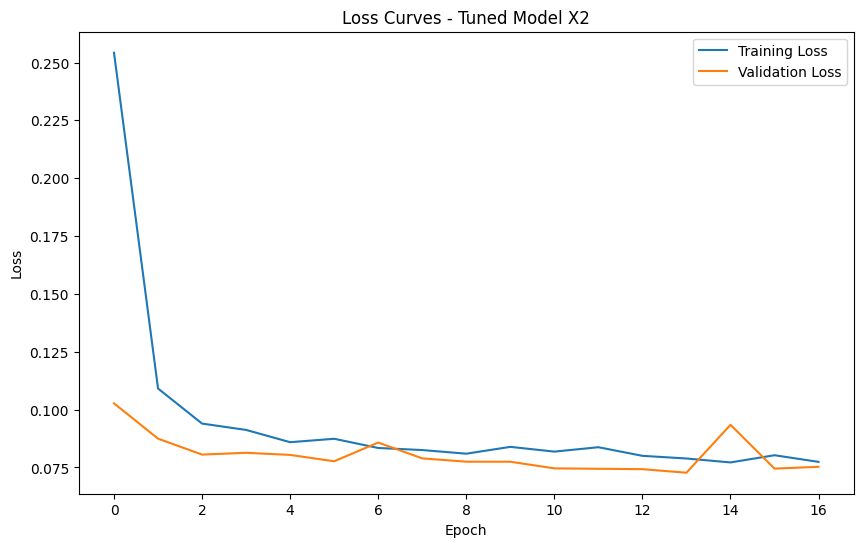

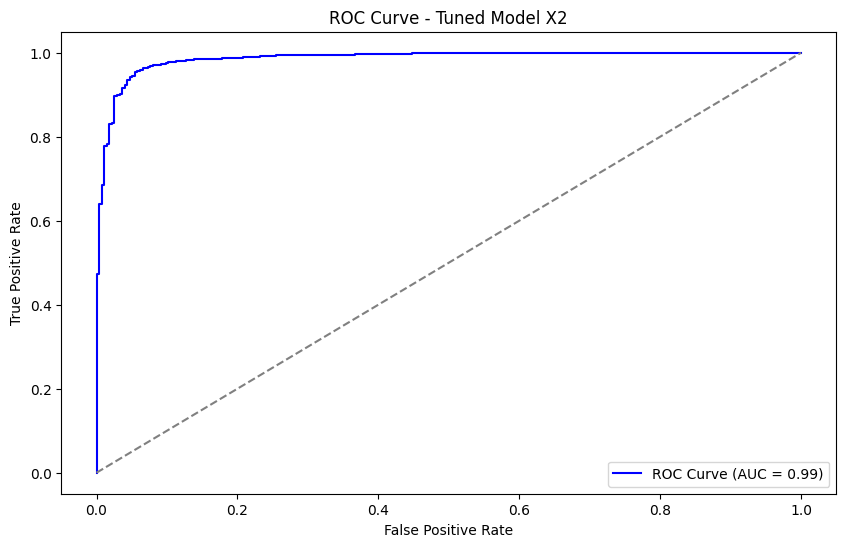

In [ ]:
# Print results for Tuned Model X2
print(f"Results for Tuned Model X2: {results_X2_tuned[1]}")
plot_metrics(results_X2_tuned[2], "Tuned Model X2")
plot_roc(y_test, results_X2_tuned[5], "Tuned Model X2")

### E) Summary

In [ ]:
# Combine all results into a DataFrame
all_results_list = [results_X1_initial, results_X1_tuned, results_X2_initial, results_X2_tuned]
results_df = create_results_dataframe(all_results_list)
results_df

,Model,Loss,F1-Score,Accuracy,Precision,Recall,F1-Score (Custom),AUC
0,Initial Model X1,0.091943,0.983692,0.969810,0.980886,0.987098,0.983982,0.976817
1,Tuned Model X1,0.090244,0.982940,0.968488,0.982662,0.983814,0.983238,0.975572
2,Initial Model X2,0.080071,0.986999,0.975981,0.983924,0.990617,0.987259,0.985227
3,Tuned Model X2,0.069081,0.987193,0.976421,0.986879,0.988037,0.987458,0.985861


In [ ]:
# Create hyperparameters summary table for tuned models
tuners_list = [results_X1_tuned[3], results_X2_tuned[3]]
model_names = ["Tuned Model X1", "Tuned Model X2"]
hyperparameters_df = create_hyperparameters_table(tuners_list, model_names)
hyperparameters_df

,units,activation,optimizer,Model
0,128,tanh,adam,Tuned Model X1
1,64,relu,adam,Tuned Model X2


In [ ]:
# Function to extract metrics for both classes and combine results into a DataFrame
def extract_metrics(results, y_test, is_tuned):
    y_pred_nn_prob = results[4] if not is_tuned else results[5]
    y_pred_nn = (y_pred_nn_prob > 0.5).astype("int32")
    class_report = classification_report(y_test, y_pred_nn, output_dict=True)

    metrics = {
        'Model': results[1]['Model'],
        'Loss': results[1]['Loss'],
        'F1-Score': results[1]['F1-Score'],
        'Accuracy': results[1]['Accuracy'],
        'Precision (No)': class_report['0']['precision'],
        'Recall (No)': class_report['0']['recall'],
        'F1-Score (No)': class_report['0']['f1-score'],
        'Precision (Yes)': class_report['1']['precision'],
        'Recall (Yes)': class_report['1']['recall'],
        'F1-Score (Yes)': class_report['1']['f1-score'],
        'AUC': results[1]['AUC']
    }
    return metrics

# Create DataFrame from results
def create_detailed_results_dataframe(all_results, y_tests):
    detailed_results_list = []
    for results, y_test in zip(all_results, y_tests):
        is_tuned = 'Tuned' in results[1]['Model']
        detailed_metrics = extract_metrics(results, y_test, is_tuned)
        detailed_results_list.append(detailed_metrics)
    results_df = pd.DataFrame(detailed_results_list)
    return results_df

### Run X1 Models

# Define initial parameters
initial_params = {
    'neurons': 64,
    'activation': 'relu',
    'optimizer': 'adam'
}

# Ensure input data is properly formatted for X1 and y
X1_train = np.array(X1_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
X1_val = np.array(X1_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.int32)
X1_test = np.array(X1_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int32)

# Run the initial model for X1
results_X1_initial = run_initial_model(X1_train, y_train, X1_val, y_val, X1_test, y_test, initial_params, "X1", epochs=100)

# Run the tuned model for X1
results_X1_tuned = run_tuned_model(X1_train, y_train, X1_val, y_val, X1_test, y_test, "X1", epochs=100)

### Run X2 Models

# Ensure input data is properly formatted for X2
X2_train = np.array(X2_train, dtype=np.float32)
X2_val = np.array(X2_val, dtype=np.float32)
X2_test = np.array(X2_test, dtype=np.float32)

# Run the initial model for X2
results_X2_initial = run_initial_model(X2_train, y_train, X2_val, y_val, X2_test, y_test, initial_params, "X2", epochs=100)

# Run the tuned model for X2
results_X2_tuned = run_tuned_model(X2_train, y_train, X2_val, y_val, X2_test, y_test, "X2", epochs=100)

### Combine All Results

# Combine all results into a detailed DataFrame
all_results = [results_X1_initial, results_X1_tuned, results_X2_initial, results_X2_tuned]
y_tests = [y_test, y_test, y_test, y_test]
detailed_results_df = create_detailed_results_dataframe(all_results, y_tests)
detailed_results_df


# Display detailed results
detailed_results_df

Checkpoint path: /content/drive/My Drive/student_dropout_tuning/best_initial_model_X1.h5
Epoch 1/100
500/511 [============================>.] - ETA: 0s - loss: 0.9210 - custom_f1_score: 0.9075

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


511/511 [==============================] - 5s 6ms/step - loss: 0.9109 - custom_f1_score: 0.9092 - val_loss: 0.3807 - val_custom_f1_score: 0.9840
Epoch 2/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3353 - custom_f1_score: 0.9740 - val_loss: 0.1995 - val_custom_f1_score: 0.9856
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.2005 - custom_f1_score: 0.9778 - val_loss: 0.1391 - val_custom_f1_score: 0.9844
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1568 - custom_f1_score: 0.9780 - val_loss: 0.1158 - val_custom_f1_score: 0.9859
Epoch 5/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1328 - custom_f1_score: 0.9784 - val_loss: 0.1030 - val_custom_f1_score: 0.9855
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1172 - custom_f1_score: 0.9805 - val_loss: 0.0974 - val_custom_f1_score: 0.9852
Epoch 7/100
511/511 [==============================] - 2s 5ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100


511/511 [==============================] - 3s 4ms/step - loss: 0.2780 - custom_f1_score: 0.9692 - val_loss: 0.1154 - val_custom_f1_score: 0.9839
Epoch 2/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1241 - custom_f1_score: 0.9803 - val_loss: 0.0980 - val_custom_f1_score: 0.9849
Epoch 3/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1114 - custom_f1_score: 0.9808 - val_loss: 0.0917 - val_custom_f1_score: 0.9834
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1072 - custom_f1_score: 0.9810 - val_loss: 0.0891 - val_custom_f1_score: 0.9848
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0994 - custom_f1_score: 0.9818 - val_loss: 0.0863 - val_custom_f1_score: 0.9855
Epoch 6/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0962 - custom_f1_score: 0.9825 - val_loss: 0.0895 - val_custom_f1_score: 0.9853
Epoch 7/100
511/511 [==============================] - 2s 4ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


511/511 [==============================] - 5s 6ms/step - loss: 0.8847 - custom_f1_score: 0.9146 - val_loss: 0.3604 - val_custom_f1_score: 0.9851
Epoch 2/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3142 - custom_f1_score: 0.9770 - val_loss: 0.1901 - val_custom_f1_score: 0.9851
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1841 - custom_f1_score: 0.9806 - val_loss: 0.1322 - val_custom_f1_score: 0.9854
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1434 - custom_f1_score: 0.9805 - val_loss: 0.1066 - val_custom_f1_score: 0.9874
Epoch 5/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1203 - custom_f1_score: 0.9820 - val_loss: 0.0969 - val_custom_f1_score: 0.9877
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.1066 - custom_f1_score: 0.9833 - val_loss: 0.0954 - val_custom_f1_score: 0.9877
Epoch 7/100
511/511 [==============================] - 2s 5ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100


511/511 [==============================] - 3s 4ms/step - loss: 0.2542 - custom_f1_score: 0.9767 - val_loss: 0.1027 - val_custom_f1_score: 0.9853
Epoch 2/100
511/511 [==============================] - 2s 4ms/step - loss: 0.1095 - custom_f1_score: 0.9839 - val_loss: 0.0900 - val_custom_f1_score: 0.9868
Epoch 3/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0948 - custom_f1_score: 0.9853 - val_loss: 0.0793 - val_custom_f1_score: 0.9886
Epoch 4/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0910 - custom_f1_score: 0.9841 - val_loss: 0.0768 - val_custom_f1_score: 0.9886
Epoch 5/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0870 - custom_f1_score: 0.9848 - val_loss: 0.0791 - val_custom_f1_score: 0.9870
Epoch 6/100
511/511 [==============================] - 2s 4ms/step - loss: 0.0867 - custom_f1_score: 0.9852 - val_loss: 0.0768 - val_custom_f1_score: 0.9873
Epoch 7/100
511/511 [==============================] - 2s 4ms/step - l

,Model,Loss,F1-Score,Accuracy,Precision (No),Recall (No),F1-Score (No),Precision (Yes),Recall (Yes),F1-Score (Yes),AUC
0,Initial Model X1,0.093331,0.981818,0.966285,0.767544,0.636364,0.695825,0.976798,0.987567,0.982153,0.977358
1,Tuned Model X1,0.090244,0.982940,0.968488,0.744444,0.730909,0.737615,0.982662,0.983814,0.983238,0.975572
2,Initial Model X2,0.080266,0.986266,0.974658,0.817460,0.749091,0.781784,0.983901,0.989209,0.986548,0.983075
3,Tuned Model X2,0.073053,0.987303,0.976642,0.814126,0.796364,0.805147,0.986882,0.988271,0.987576,0.985204
